In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from scipy.stats import zscore
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

In [26]:
df = pd.read_csv('walmart_cleaned.csv')
df

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,423281,45,2012-10-26,0,13.0,26240.14,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421566,423282,45,2012-10-26,0,16.0,2660.02,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421567,423283,45,2012-10-26,0,32.0,4131.54,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421568,423284,45,2012-10-26,0,83.0,717.82,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221


+ Store: cửa hàng
+ Date : ngày bán hàng
+ IsHoliday: có phải kỳ nghỉ hay không
+ Dept: bộ phận
+ Weekly_Sales: doanh số bán hàng
+ Temperature: Nhiệt độ
+ Fuel_Price: Giá nhiên liệu
+ MarkDown: khoảng giảm giá
+ CPI: Chỉ số giá tiêu dùng phổ biến
+ Unemployment: Tỷ lệ thất nghiệp phổ biến
+ Type: Loại
+ Size: Kích cỡ


In [27]:
df.head()

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


In [28]:
df.tail()

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
421565,423281,45,2012-10-26,0,13.0,26240.14,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421566,423282,45,2012-10-26,0,16.0,2660.02,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421567,423283,45,2012-10-26,0,32.0,4131.54,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421568,423284,45,2012-10-26,0,83.0,717.82,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421569,423285,45,2012-10-26,0,98.0,1076.80,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221


In [29]:
df = df.drop(columns = (['Unnamed: 0']))
df

,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,0,13.0,26240.14,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421566,45,2012-10-26,0,16.0,2660.02,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421567,45,2012-10-26,0,32.0,4131.54,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421568,45,2012-10-26,0,83.0,717.82,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  object 
 2   IsHoliday     421570 non-null  int64  
 3   Dept          421570 non-null  float64
 4   Weekly_Sales  421570 non-null  float64
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     421570 non-null  float64
 8   MarkDown2     421570 non-null  float64
 9   MarkDown3     421570 non-null  float64
 10  MarkDown4     421570 non-null  float64
 11  MarkDown5     421570 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  int64  
 15  Size          421570 non-null  int64  
dtypes: float64(11), int64(4), object(1)
memory usage: 51.5+ MB


In [31]:
df.isnull().sum()

Store           0
Date            0
IsHoliday       0
Dept            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [32]:
df = df.dropna()

In [33]:
df.isnull().sum()

Store           0
Date            0
IsHoliday       0
Dept            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

<Axes: >

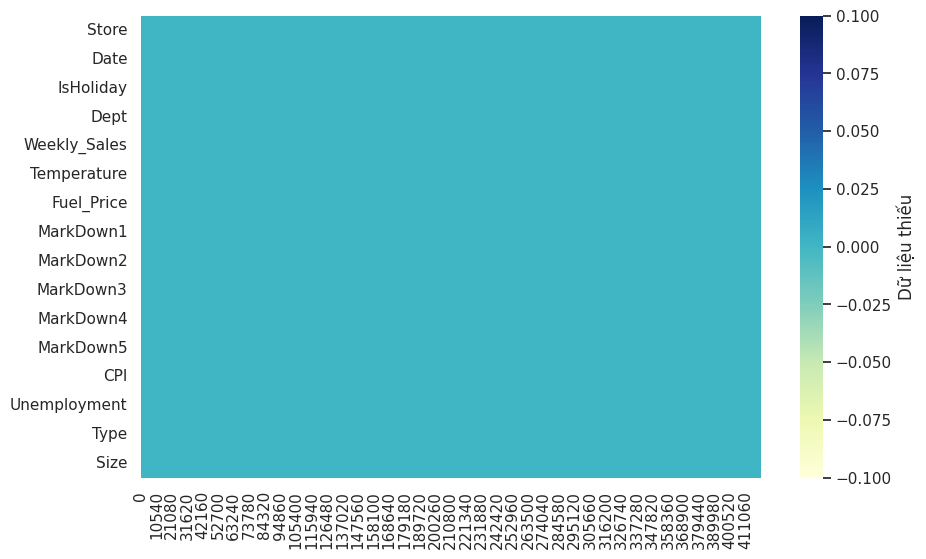

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),cmap='YlGnBu', cbar_kws={'label':'Dữ liệu thiếu'})

In [35]:
df.duplicated().sum()

0

In [36]:
df.shape


(421570, 16)

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
IsHoliday,421570.0,0.070358,0.255750,0.000,0.000000,0.00000,0.000000,1.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,421570.0,2590.074819,6052.385934,0.000,0.000000,0.00000,2809.050000,88646.760000
MarkDown2,421570.0,879.974298,5084.538801,-265.760,0.000000,0.00000,2.200000,104519.540000
MarkDown3,421570.0,468.087665,5528.873453,-29.100,0.000000,0.00000,4.540000,141630.610000
MarkDown4,421570.0,1083.132268,3894.529945,0.000,0.000000,0.00000,425.290000,67474.850000


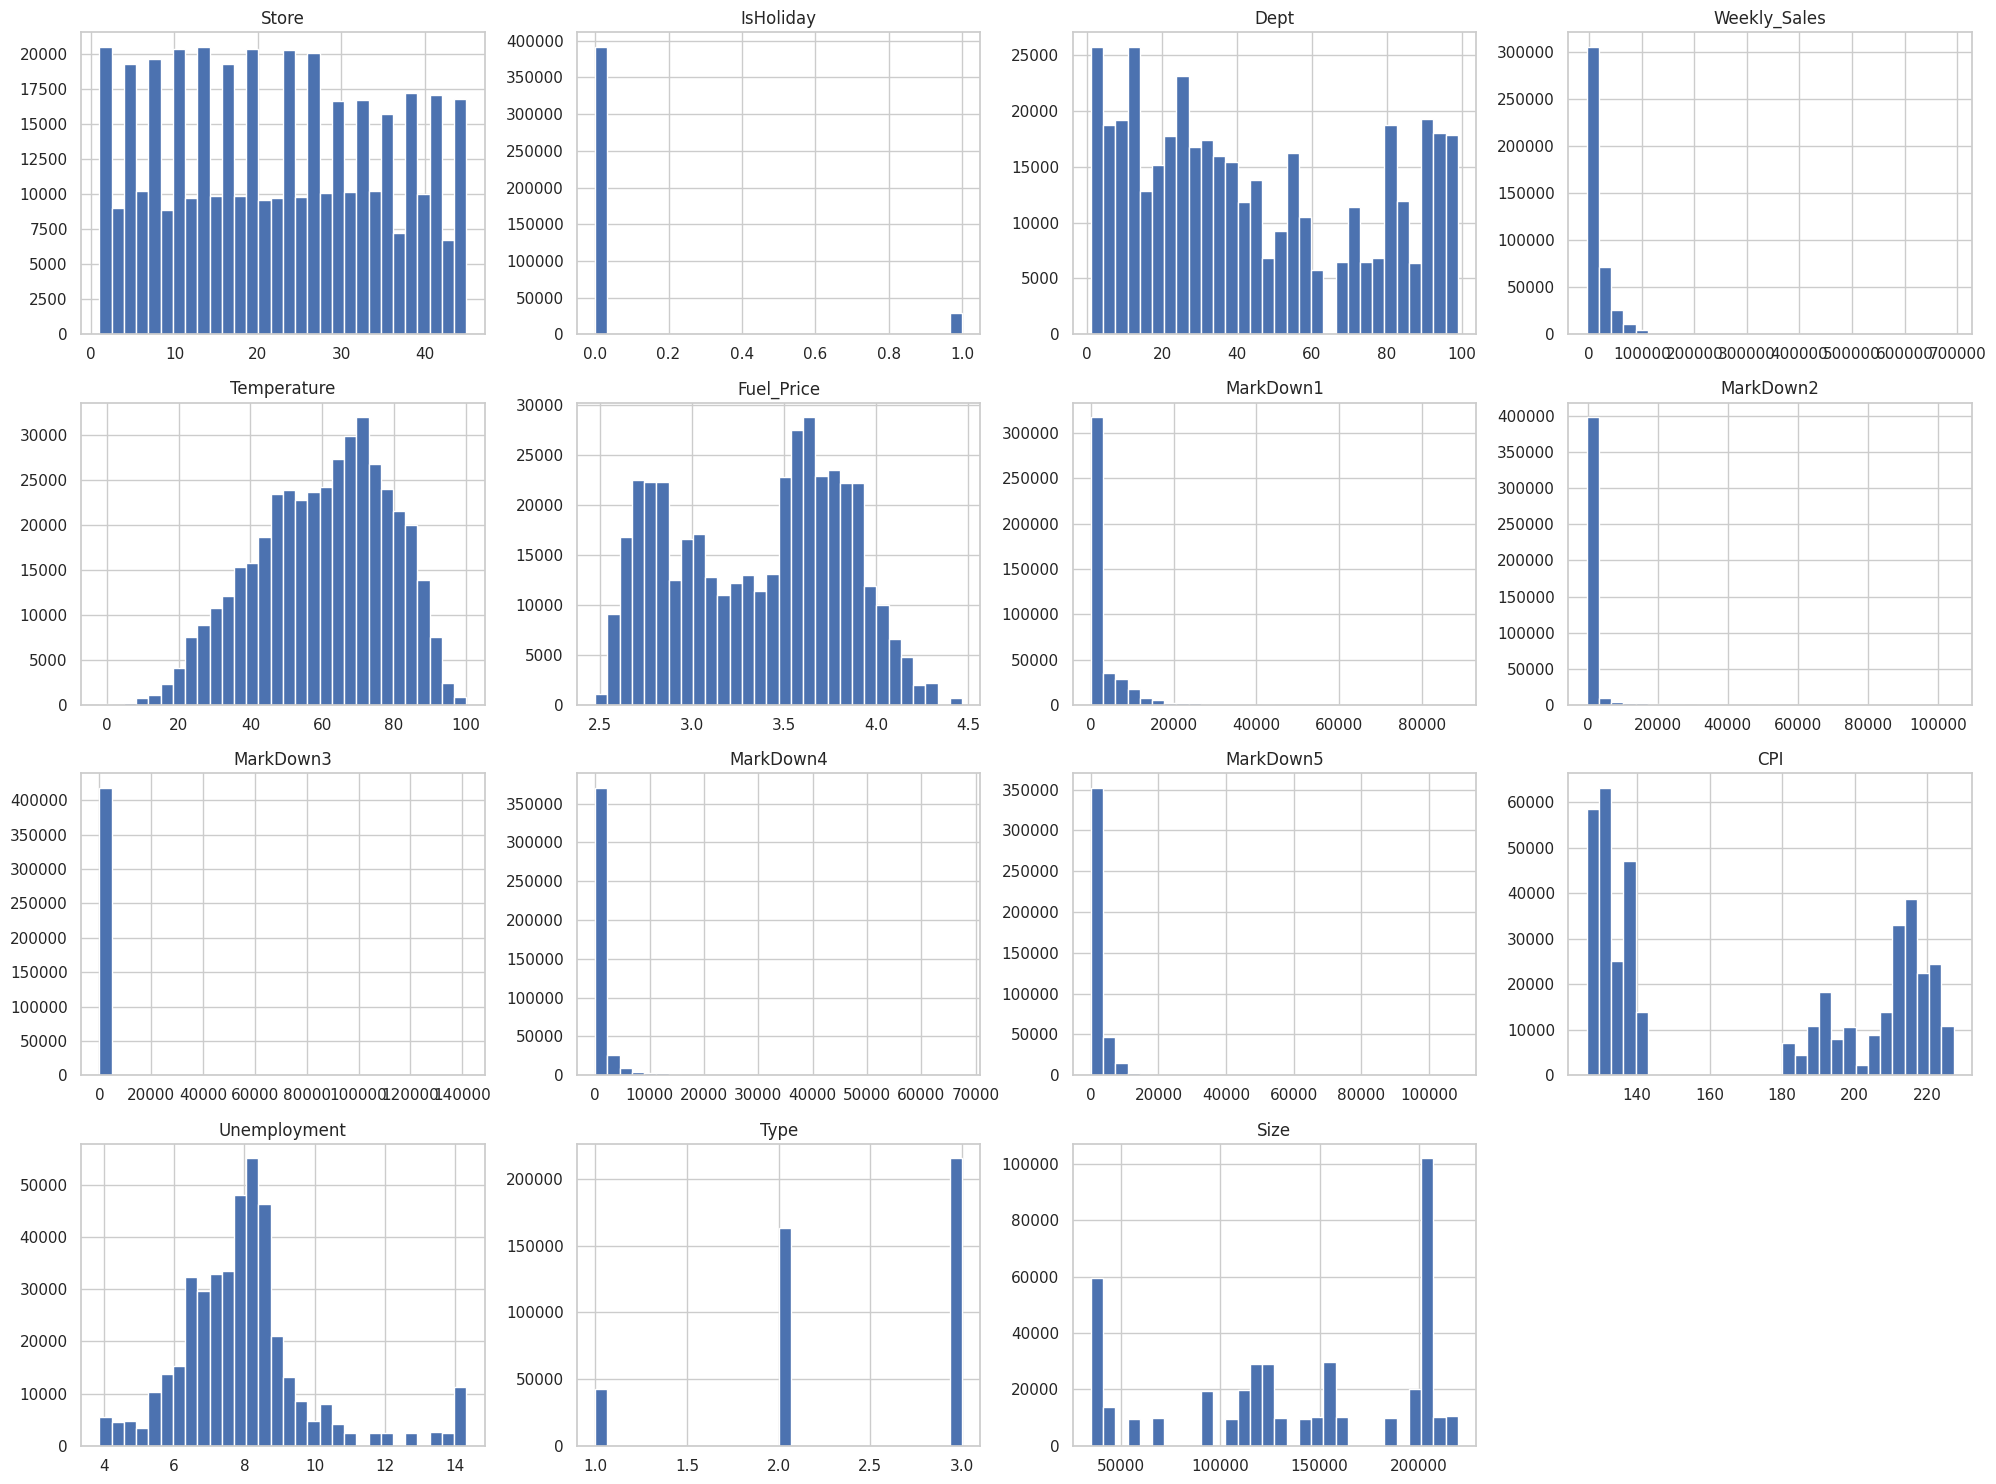

In [38]:
# Set the style of the seaborn plot
sns.set(style="whitegrid")

# Plot histograms of the numerical columns
df.hist(bins=30, figsize=(20,15))
plt.tight_layout()
plt.show()

Từ MarkDown1 đến MarkDown5: Các cột nghiêng nhiều về 0, cho biết rằng các khoản giảm giá hoặc khuyến mãi không được áp dụng hàng tuần. Chỉ có một vài tuần xảy ra hiện tượng giảm giá, và trong hầu hết các tuần khác giá trị ở mức 0.

IsHoliday: Đây là biến cho biết một tuần có phải là tuần nghỉ lễ hay không. Dự kiến số tuần nghỉ lễ sẽ ít hơn so với các tuần không nghỉ lễ vì số ngày nghỉ lễ tương đối ít thường xuyên hơn.

CPI, Temperature, and Unemployment: Các cột này dường như có phân phối chuẩn ít nhiều. Sự phân bố Temperature hơi lệch trái, cho thấy nhiệt độ thấp hơn có thể phổ biến hơn. CPI (Chỉ số giá tiêu dùng) và Unemployment dường như có sự phân bổ tương đối cân xứng.

Fuel_Price: Sự phân bố của Fuel_price hơi lệch trái. Điều này cho thấy rằng giá nhiên liệu cao hơn ít phổ biến hơn và giá nhiên liệu thấp hơn thường xuyên được quan sát thấy hơn.

Weekly_Sales: Việc phân phối Weekly_Sales bị lệch trái nhiều. Điều này cho thấy số tiền bán hàng cao hơn ít phổ biến hơn, trong khi số tiền bán hàng thấp hơn xảy ra thường xuyên hơn.

Size and Type: Các quan sát cho thấy rằng các cửa hàng lớn hơn và các cửa hàng loại 3  phổ biến hơn trong tập dữ liệu. Điều này có thể nói rằng phần lớn các cửa hàng trong tập dữ liệu đều lớn hơn và thuộc loại 3.

<ipython-input-39-6120a622517c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


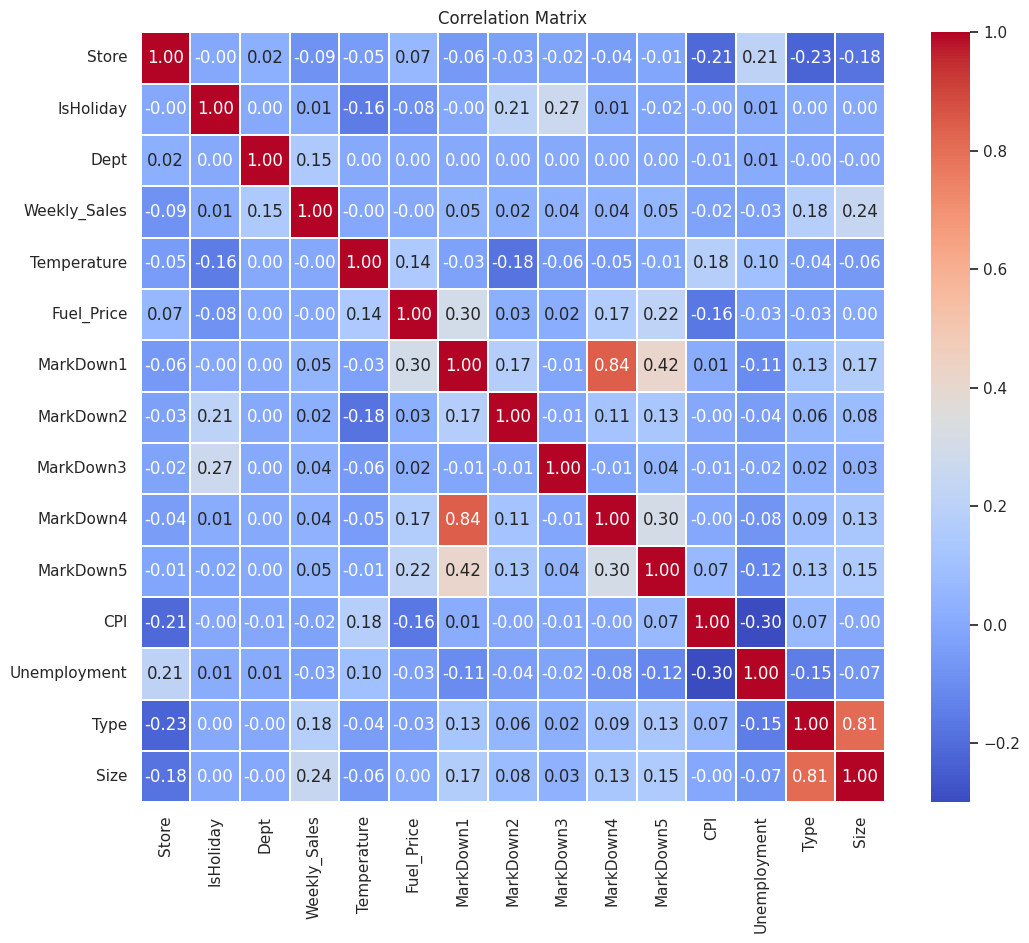

In [39]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.1)
plt.title('Correlation Matrix')
plt.show()

- Weekly_Sales và Size: Có mối tương quan dương giữa Weekly_Sales và Size, cho thấy các cửa hàng lớn hơn có xu hướng có doanh thu cao hơn. Điều này cho thấy quy mô cửa hàng có thể ảnh hưởng đến hiệu suất bán hàng.

- Weekly_Sales và Type:có một mối tương quan nhẹ giữa loại Type và Weekly_Sales. Tuy nhiên, mối tương quan này không đáng kể, điều này có nghĩa là các yếu tố khác có tác động lớn hơn đến doanh số bán hàng.

- Weekly_Sales và Dept:
Weekly_Sales cũng có mối tương quan tích cực với Dept, cho thấy rằng một số bộ phận nhất định trong cửa hàng có xu hướng có doanh số bán hàng cao hơn so với các bộ phận khác.

- Weekly_Sales và MarkDown features: Các MarkDown ít có mối tương quan với Weekly_Sales. Điều này cho thấy rằng những khoản giảm giá khuyến mãi này có thể không có tác động đáng kể đến doanh số bán hàng.

- Weekly_Sales và Temperature, Unemployment,Fuel_Price: Weekly_Sales cũng có tương quan âm với các biến Temperature, Unemployment và Fuel_Price. Điều này có nghĩa là khi nhiệt độ càng cao thì mọi người có xu hướng hạn chế ra ngoài mua sắm; tỷ lệ thất nghiệp thấp thì mọi người sẽ có tiền để chi tiêu; giá nhiên liệu thấp thì sẽ phù hợp với nhiều người hơn. Doanh số sẽ tăng

In [40]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Date          421570 non-null  datetime64[ns]
 2   IsHoliday     421570 non-null  int64         
 3   Dept          421570 non-null  float64       
 4   Weekly_Sales  421570 non-null  float64       
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  int64         
 15  Size          421

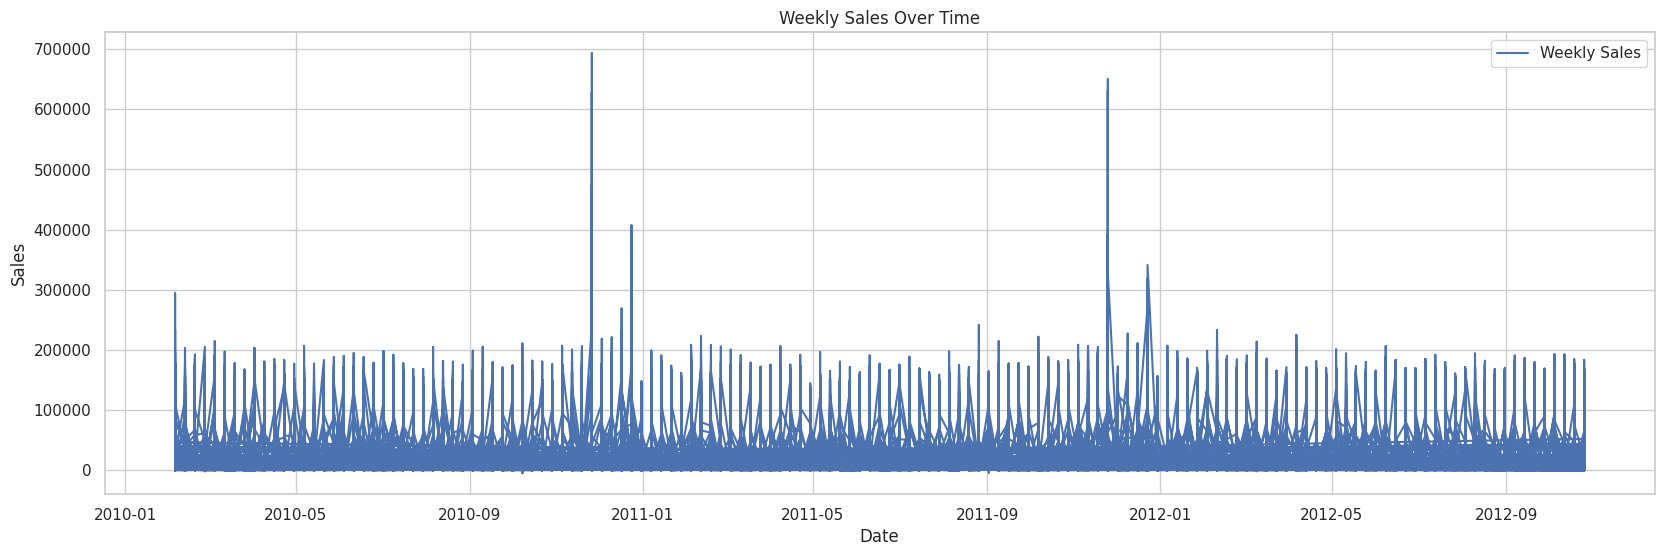

In [41]:
plt.figure(figsize=(20, 6))
plt.plot(df['Date'], df['Weekly_Sales'],label='Weekly Sales')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

Biểu đồ hiển thị Weekly_Sales theo thời gian. Có một mô hình rõ ràng về doanh số bán hàng đạt đỉnh vào những thời điểm nhất định trong năm, có thể tương ứng với các mùa mua sắm phổ biến như kỳ nghỉ lễ cuối năm.

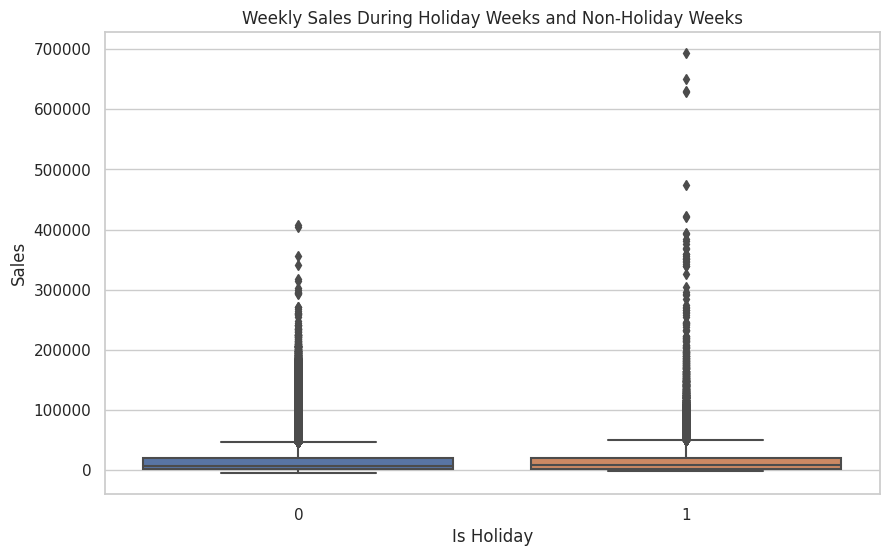

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=df)
plt.title('Weekly Sales During Holiday Weeks and Non-Holiday Weeks')
plt.xlabel('Is Holiday')
plt.ylabel('Sales')
plt.show()

Biểu đồ hiển thị sự phân bổ của Weekly_Sales trong các tuần nghỉ lễ và tuần không nghỉ lễ. Chúng ta có thể quan sát rằng doanh số bán hàng trung bình trong những tuần nghỉ lễ cao hơn một chút so với những tuần không nghỉ lễ, điều này được dự kiến vì những ngày nghỉ lễ thường tương ứng với mức chi tiêu của người tiêu dùng tăng lên.

In [43]:
df['Month'] = df['Date'].dt.month
df['Size_Type'] = df['Size'] * df['Type']
features = ['Size', 'Dept', 'IsHoliday', 'Type', 'CPI', 'Unemployment', 'Month', 'Size_Type']
target = 'Weekly_Sales'

In [44]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h3> Linear Regression </h3>

In [45]:
# Simple Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression RMSE: {rmse_lr}, R2 Score: {r2_lr}')

Linear Regression RMSE: 21794.594887247673, R2 Score: 0.08389804497005737


<h3>Random Forest </h3>

In [46]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest RMSE: {rmse_rf}, R2 Score: {r2_rf}')

Random Forest RMSE: 4444.676278068435, R2 Score: 0.9618998681459785


<h3>Neural Network with Keras</h3>

In [47]:
nn_model = Sequential()
nn_model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
nn_model.fit(X_train, y_train, epochs=10, batch_size=32)
y_pred_nn = nn_model.predict(X_test)
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
r2_nn = r2_score(y_test, y_pred_nn)
print(f'Neural Network RMSE: {rmse_nn}, R2 Score: {r2_nn}')

Epoch 1/10
10540/10540 [==============================] - 19s 2ms/step - loss: 491549440.0000
Epoch 2/10
10540/10540 [==============================] - 20s 2ms/step - loss: 486441696.0000
Epoch 3/10
10540/10540 [==============================] - 21s 2ms/step - loss: 484764704.0000
Epoch 4/10
10540/10540 [==============================] - 19s 2ms/step - loss: 482660512.0000
Epoch 5/10
10540/10540 [==============================] - 19s 2ms/step - loss: 481832768.0000
Epoch 6/10
10540/10540 [==============================] - 18s 2ms/step - loss: 480820192.0000
Epoch 7/10
10540/10540 [==============================] - 19s 2ms/step - loss: 479697920.0000
Epoch 8/10
10540/10540 [==============================] - 18s 2ms/step - loss: 478372960.0000
Epoch 9/10
10540/10540 [==============================] - 18s 2ms/step - loss: 477578880.0000
Epoch 10/10
2635/2635 [==============================] - 4s 1ms/step
Neural Network RMSE: 21897.201338925457, R2 Score: 0.0752519345653051


<h3>XGB Regressor</h3>

In [48]:
import sklearn.metrics

In [49]:

# Create a XGB regressor model
model = xgb.XGBRegressor(n_estimators=30,max_depth=9)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae,2))
print("Mean Squared Error (MSE):", round(mse,2))
print("Root Mean Squared Error (RMSE):", round(rmse,2))
print("R-squared (R2) Score:", round(r2,2))

Mean Absolute Error (MAE): 2648.12
Mean Squared Error (MSE): 27579742.61
Root Mean Squared Error (RMSE): 5251.64
R-squared (R2) Score: 0.95


In [51]:

svr_model = SVR()

svr_model.fit(X_test, y_test)

predict_svr_y = svr_model.predict(X_test)

mse = mean_squared_error(y_test, predict_svr_y)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predict_svr_y)

print("Root Mean Squared Error (RMSE) is:", rmse)
print("R-squared (R2) Score is:", r2)

Root Mean Squared Error (RMSE) is: 23895.781376665753
R-squared (R2) Score is: -0.10125699680108036
